### Step 1: Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Step 2: Importing Dataset

In [2]:
df = pd.read_csv("archive/data.csv")

In [3]:
df.head()

,Company,Date,Close/Last,Volume,Open,High,Low
0,AAPL,07/17/2023,$193.99,50520160,$191.90,$194.32,$191.81
1,AAPL,07/14/2023,$190.69,41616240,$190.23,$191.1799,$189.63
2,AAPL,07/13/2023,$190.54,41342340,$190.50,$191.19,$189.78
3,AAPL,07-12-2023,$189.77,60750250,$189.68,$191.70,$188.47
4,AAPL,07-11-2023,$188.08,46638120,$189.16,$189.30,$186.60


### Step 3: Data Preprocessing

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25160 entries, 0 to 25159
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Company     25160 non-null  object
 1   Date        25160 non-null  object
 2   Close/Last  25160 non-null  object
 3   Volume      25160 non-null  int64 
 4   Open        25160 non-null  object
 5   High        25160 non-null  object
 6   Low         25160 non-null  object
dtypes: int64(1), object(6)
memory usage: 1.3+ MB


In [5]:
df.isna().sum()

Company       0
Date          0
Close/Last    0
Volume        0
Open          0
High          0
Low           0
dtype: int64

In [6]:
df.columns

Index(['Company', 'Date', 'Close/Last', 'Volume', 'Open', 'High', 'Low'], dtype='object')

In [7]:
df.rename(columns = {"Close/Last":"Close"}, inplace = True)

In [8]:
df.columns

Index(['Company', 'Date', 'Close', 'Volume', 'Open', 'High', 'Low'], dtype='object')

In [9]:
df["Date"] = pd.to_datetime(df["Date"])

In [10]:
df["Date"]

0       2023-07-17
1       2023-07-14
2       2023-07-13
3       2023-07-12
4       2023-07-11
           ...    
25155   2013-07-24
25156   2013-07-23
25157   2013-07-22
25158   2013-07-19
25159   2013-07-18
Name: Date, Length: 25160, dtype: datetime64[ns]

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25160 entries, 0 to 25159
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Company  25160 non-null  object        
 1   Date     25160 non-null  datetime64[ns]
 2   Close    25160 non-null  object        
 3   Volume   25160 non-null  int64         
 4   Open     25160 non-null  object        
 5   High     25160 non-null  object        
 6   Low      25160 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 1.3+ MB


In [12]:
def preprocessing(col):
    col = col.str.replace("$",".").str.replace(".","").astype(float)/100
    return col

In [13]:
column_to_process = ["Close","Open","High","Low"]
df[column_to_process] = df[column_to_process].apply(preprocessing)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_11576\34717911.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  col = col.str.replace("$",".").str.replace(".","").astype(float)/100


In [14]:
df[column_to_process]

,Close,Open,High,Low
0,193.99,191.90,194.32,191.81
1,190.69,190.23,19117.99,189.63
2,190.54,190.50,191.19,189.78
3,189.77,189.68,191.70,188.47
4,188.08,189.16,189.30,186.60
...,...,...,...,...
25155,3447.14,3567.43,3603.57,3431.43
25156,3575.14,3591.43,3746.21,3517.14
25157,3742.28,3812.14,3839.28,3673.14
25158,3779.66,3820.43,3827.84,3759.71


In [15]:
df.head()

,Company,Date,Close,Volume,Open,High,Low
0,AAPL,2023-07-17,193.99,50520160,191.90,194.32,191.81
1,AAPL,2023-07-14,190.69,41616240,190.23,19117.99,189.63
2,AAPL,2023-07-13,190.54,41342340,190.50,191.19,189.78
3,AAPL,2023-07-12,189.77,60750250,189.68,191.70,188.47
4,AAPL,2023-07-11,188.08,46638120,189.16,189.30,186.60


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25160 entries, 0 to 25159
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Company  25160 non-null  object        
 1   Date     25160 non-null  datetime64[ns]
 2   Close    25160 non-null  float64       
 3   Volume   25160 non-null  int64         
 4   Open     25160 non-null  float64       
 5   High     25160 non-null  float64       
 6   Low      25160 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 1.3+ MB


In [17]:
df["Year"] = df["Date"].dt.year

In [18]:
df["Year"]

0        2023
1        2023
2        2023
3        2023
4        2023
         ... 
25155    2013
25156    2013
25157    2013
25158    2013
25159    2013
Name: Year, Length: 25160, dtype: int64

In [19]:
mean_volume_per_year = df.groupby(["Company","Year"])["Volume"].mean().reset_index()

In [20]:
mean_volume_per_year

,Company,Year,Volume
0,AAPL,2013,3.413939e+08
1,AAPL,2014,2.516821e+08
2,AAPL,2015,2.065851e+08
3,AAPL,2016,1.530707e+08
4,AAPL,2017,1.080108e+08
...,...,...,...
105,TSLA,2019,1.376075e+08
106,TSLA,2020,2.261033e+08
107,TSLA,2021,8.219330e+07
108,TSLA,2022,8.695692e+07


### Step 4: EDA

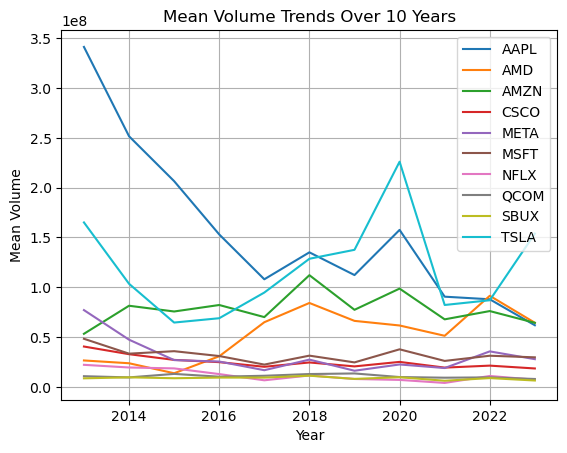

In [21]:
companies = mean_volume_per_year['Company'].unique()
for company in companies:
    company_data = mean_volume_per_year[mean_volume_per_year['Company'] == company]
    plt.plot(company_data['Year'], company_data['Volume'], label=company)

plt.xlabel('Year')
plt.ylabel('Mean Volume')
plt.title('Mean Volume Trends Over 10 Years')
plt.legend()
plt.grid(True)
plt.show()

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25160 entries, 0 to 25159
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Company  25160 non-null  object        
 1   Date     25160 non-null  datetime64[ns]
 2   Close    25160 non-null  float64       
 3   Volume   25160 non-null  int64         
 4   Open     25160 non-null  float64       
 5   High     25160 non-null  float64       
 6   Low      25160 non-null  float64       
 7   Year     25160 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(2), object(1)
memory usage: 1.5+ MB


In [26]:
# Get the top 10 companies
top_10_companies = df["Company"].value_counts().head(10).index.to_list()
top_10_companies

['AAPL', 'SBUX', 'MSFT', 'CSCO', 'QCOM', 'META', 'AMZN', 'TSLA', 'AMD', 'NFLX']

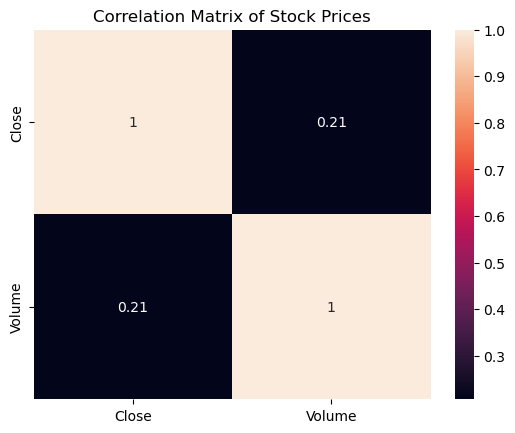

In [27]:
# Calculate the correlation between the stock prices of different companies
correlation_matrix = df[["Close", "Volume"]].corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title("Correlation Matrix of Stock Prices")
plt.show()


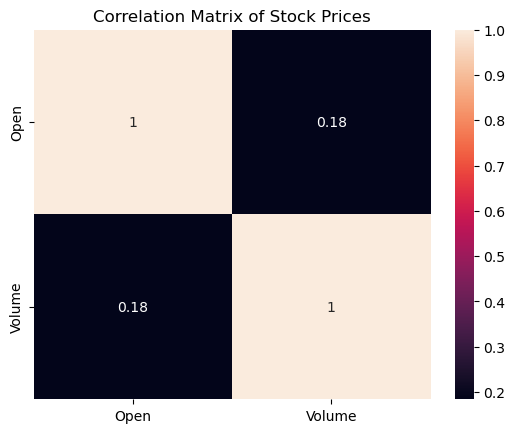

In [28]:
correlation_matrix = df[["Open", "Volume"]].corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title("Correlation Matrix of Stock Prices")
plt.show()

In [29]:
# Data Summary and Missing Values
print(df.describe())
print(df.isnull().sum())

              Close        Volume          Open          High           Low  \
count  25160.000000  2.516000e+04  25160.000000  25160.000000  25160.000000   
mean    1154.733865  5.131764e+07   1176.014039   1813.617468   1750.210887   
std     3626.354281  6.399143e+07   3698.487293   5402.917981   5120.873735   
min        1.620000  1.143952e+06      1.620000      1.690000      1.610000   
25%       55.630000  1.200394e+07     54.677500     56.797500     55.720000   
50%      122.155000  2.672083e+07    118.230000    136.710000    133.945000   
75%      345.892500  6.857269e+07    370.260000    536.355000    530.097500   
max    40736.330000  1.065209e+09  63217.910000  70098.940000  62059.010000   

               Year  
count  25160.000000  
mean    2018.035374  
std        2.913342  
min     2013.000000  
25%     2016.000000  
50%     2018.000000  
75%     2021.000000  
max     2023.000000  
Company    0
Date       0
Close      0
Volume     0
Open       0
High       0
Low        0

In [30]:
df.head()

,Company,Date,Close,Volume,Open,High,Low,Year
0,AAPL,2023-07-17,193.99,50520160,191.90,194.32,191.81,2023
1,AAPL,2023-07-14,190.69,41616240,190.23,19117.99,189.63,2023
2,AAPL,2023-07-13,190.54,41342340,190.50,191.19,189.78,2023
3,AAPL,2023-07-12,189.77,60750250,189.68,191.70,188.47,2023
4,AAPL,2023-07-11,188.08,46638120,189.16,189.30,186.60,2023


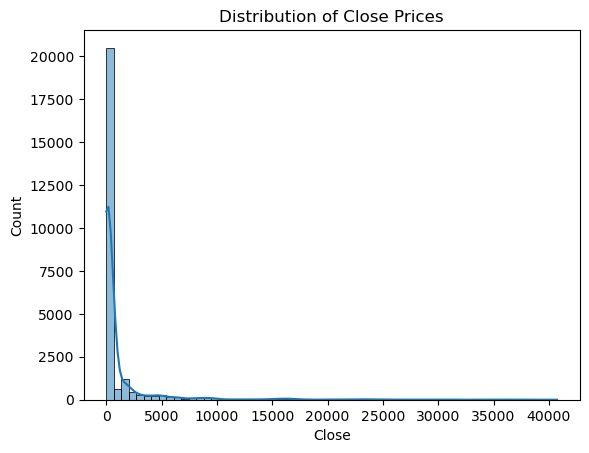

In [31]:
# Data Visualization
sns.histplot(data=df, x="Close", bins=60, kde=True)
plt.title("Distribution of Close Prices")
plt.show()

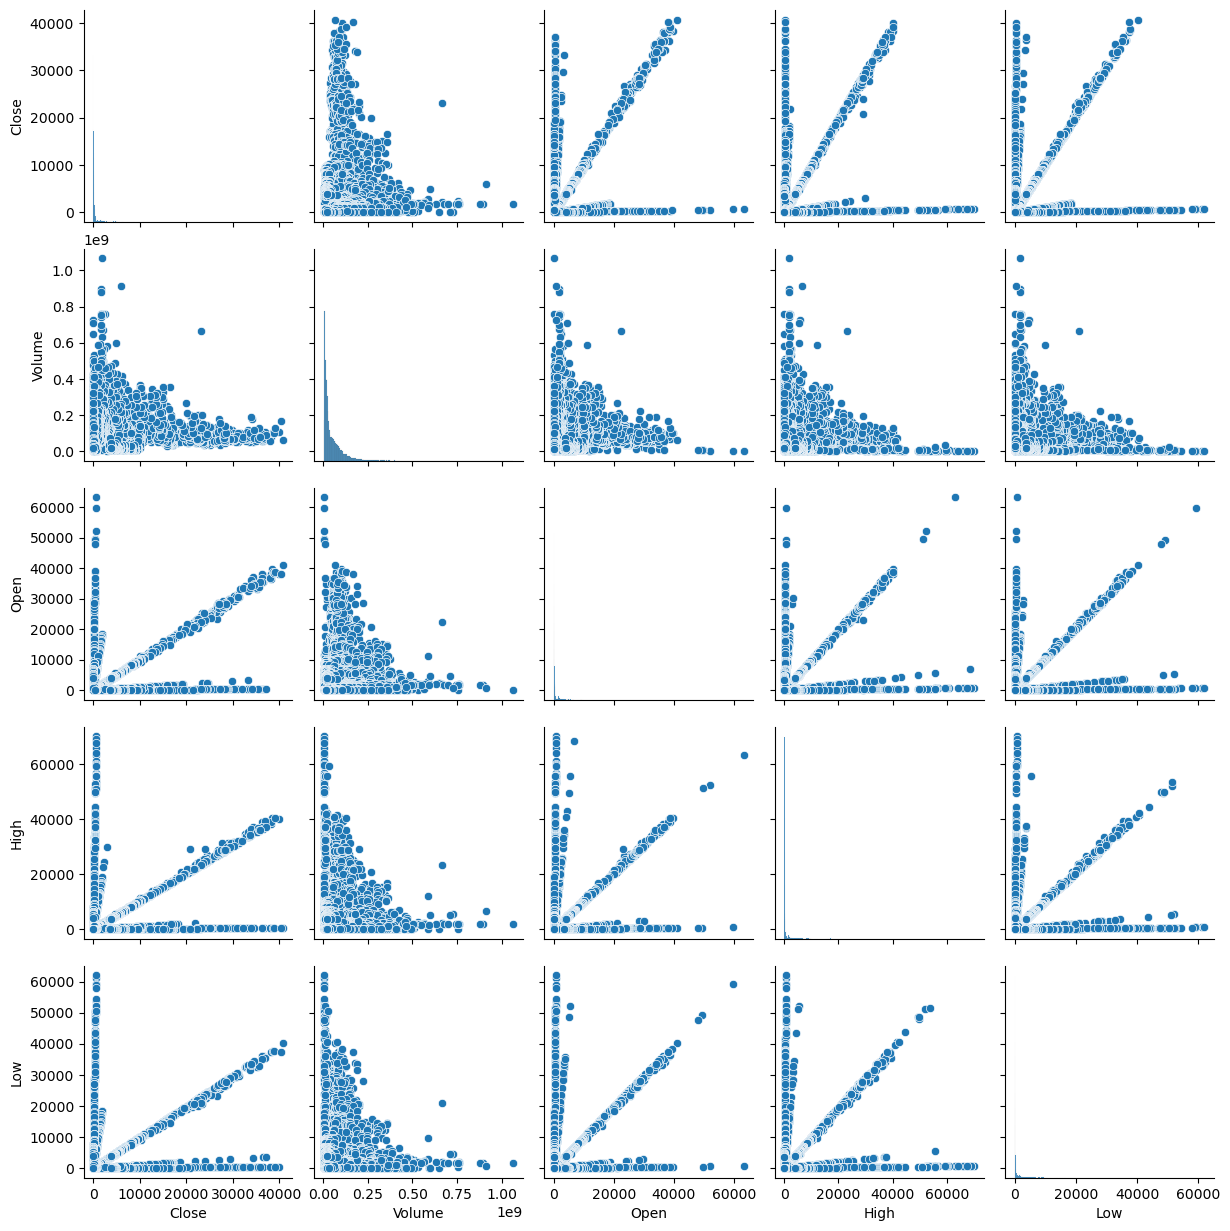

In [32]:
# Pair Plot
sns.pairplot(df, vars=["Close", "Volume", "Open", "High", "Low"])
plt.show()

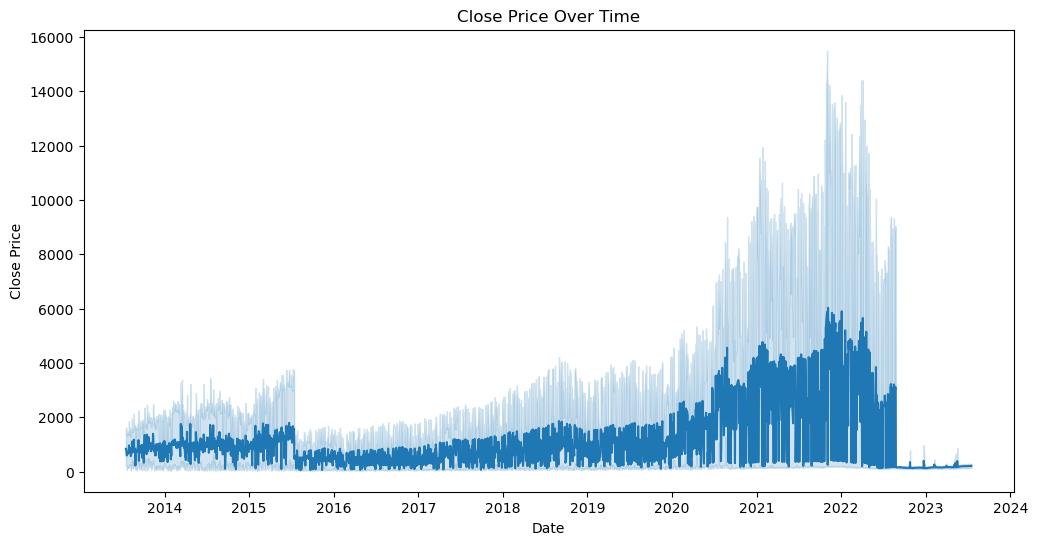

In [33]:
# Time Series Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x="Date", y="Close")
plt.title("Close Price Over Time")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.show()

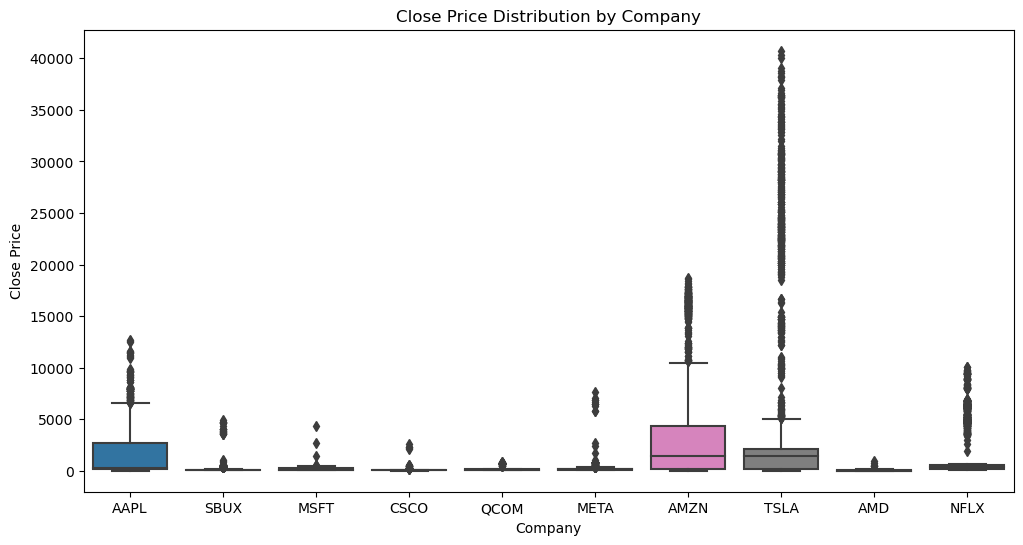

In [34]:
# Box Plot by Company
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="Company", y="Close")
plt.title("Close Price Distribution by Company")
plt.xlabel("Company")
plt.ylabel("Close Price")
plt.show()

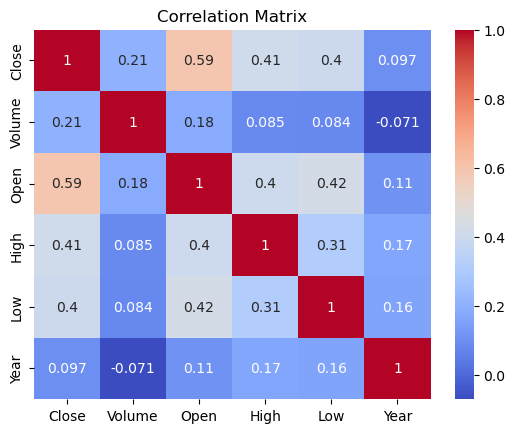

In [35]:
# Correlation Analysis
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

### Step 5: Feature Engineering

In [36]:
# Feature Engineering
df["Month"] = df["Date"].dt.month
df["DayOfWeek"] = df["Date"].dt.dayofweek

In [37]:
df.head()

,Company,Date,Close,Volume,Open,High,Low,Year,Month,DayOfWeek
0,AAPL,2023-07-17,193.99,50520160,191.90,194.32,191.81,2023,7,0
1,AAPL,2023-07-14,190.69,41616240,190.23,19117.99,189.63,2023,7,4
2,AAPL,2023-07-13,190.54,41342340,190.50,191.19,189.78,2023,7,3
3,AAPL,2023-07-12,189.77,60750250,189.68,191.70,188.47,2023,7,2
4,AAPL,2023-07-11,188.08,46638120,189.16,189.30,186.60,2023,7,1


### Step 6: Creating Target Variable

In [38]:
# Sort the data by date in ascending order
df.sort_values(by=['Date'], ascending=True, inplace=True)

# Create the 'Price_Up' column
df['Price_Up'] = (df['Close'].shift(-1) > df['Close']).astype(int)

# Drop the last row since there's no next-day data for it
df.dropna(subset=['Price_Up'], inplace=True)

# Reset the index
df.reset_index(drop=True, inplace=True)

In [39]:
df.head()

,Company,Date,Close,Volume,Open,High,Low,Year,Month,DayOfWeek,Price_Up
0,QCOM,2013-07-18,611.15,23673110,61.94,62.02,60.82,2013,7,3,0
1,AMD,2013-07-18,4.64,69380920,4.38,4.65,4.37,2013,7,3,1
2,TSLA,2013-07-18,793.53,170465465,806.47,81.82,774.53,2013,7,3,1
3,AMZN,2013-07-18,1520.55,61176700,1531.35,153.17,1509.35,2013,7,3,0
4,META,2013-07-18,26.18,24697620,26.75,26.77,26.12,2013,7,3,0


### Step 7: Split Data into Training and Test Sets

In [40]:
from sklearn.model_selection import train_test_split

X = df[['Volume', 'Open']]
y = df['Price_Up']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Step 8: ML models and Evaluation

In [41]:
from sklearn.linear_model import LogisticRegression

# Create and train the model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)


LogisticRegression(random_state=42)

In [42]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


Accuracy: 0.5023847376788553
Confusion Matrix:
 [[2528    0]
 [2504    0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.50      1.00      0.67      2528
           1       0.00      0.00      0.00      2504

    accuracy                           0.50      5032
   macro avg       0.25      0.50      0.33      5032
weighted avg       0.25      0.50      0.34      5032



C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [43]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [44]:
# Make predictions on the test data
rf_predictions = rf_model.predict(X_test)

# Calculate accuracy
rf_accuracy = accuracy_score(y_test, rf_predictions)

# Create a confusion matrix
rf_confusion_matrix = confusion_matrix(y_test, rf_predictions)

# Generate a classification report
rf_classification_report = classification_breport(y_test, rf_predictions)

print("Random Forest Accuracy:", rf_accuracy)
print("Random Forest Confusion Matrix:\n", rf_confusion_matrix)
print("Random Forest Classification Report:\n", rf_classification_report)

Random Forest Accuracy: 0.6587837837837838
Random Forest Confusion Matrix:
 [[1668  860]
 [ 857 1647]]
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.66      0.66      2528
           1       0.66      0.66      0.66      2504

    accuracy                           0.66      5032
   macro avg       0.66      0.66      0.66      5032
weighted avg       0.66      0.66      0.66      5032



In [46]:
!pip install xgboost

     ---------------------------------------- 99.7/99.7 MB 1.2 MB/s eta 0:00:00


In [47]:
from xgboost import XGBClassifier

model_xgb = XGBClassifier(random_state=42)
model_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [48]:
# Make predictions on the test data
xgb_predictions = model_xgb.predict(X_test)

# Calculate accuracy
xgb_accuracy = accuracy_score(y_test, xgb_predictions)

# Create a confusion matrix
xgb_confusion_matrix = confusion_matrix(y_test, xgb_predictions)

# Generate a classification report
xgb_classification_report = classification_report(y_test, xgb_predictions)

print("XGBoost Accuracy:", xgb_accuracy)
print("XGBoost Confusion Matrix:\n", xgb_confusion_matrix)
print("XGBoost Classification Report:\n", xgb_classification_report)

XGBoost Accuracy: 0.6856120826709062
XGBoost Confusion Matrix:
 [[1746  782]
 [ 800 1704]]
XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.69      0.69      2528
           1       0.69      0.68      0.68      2504

    accuracy                           0.69      5032
   macro avg       0.69      0.69      0.69      5032
weighted avg       0.69      0.69      0.69      5032

